# Naive Bayes Application

## Salary Classification

[`adult`](https://archive.ics.uci.edu/ml/datasets/adult) dataset.

### Data Set Information

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year.

### Classification with `CategoricalNB`

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('adult.csv')

# Drop missing
df = df.dropna()

# Drop numeric
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
df = df[cat_cols]
df.reset_index(drop=True, inplace=True)

df

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
45217,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
45218,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
45219,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
45220,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


#### 1. Pre-processing

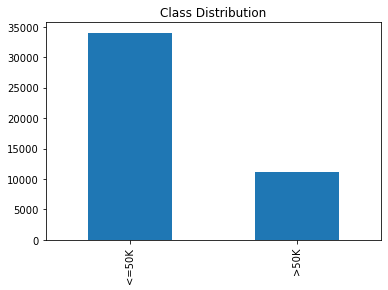

<=50K    0.752156
>50K     0.247844
Name: class, dtype: float64


In [4]:
df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()
print(df['class'].value_counts(normalize=True))

In this case we didn't OHE, not sure what the effect will be if we do OHE in terms of performance. But lets just do it anyway lol

In [5]:
from sklearn.preprocessing import LabelEncoder

df_e = df.apply(LabelEncoder().fit_transform)
df_e

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,5,9,4,0,1,4,1,38,0
1,4,9,2,3,0,4,1,38,0
2,2,11,0,5,1,4,1,38,0
3,2,1,2,5,0,2,1,38,0
4,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...
45217,2,9,4,9,3,4,1,38,0
45218,2,9,0,9,1,4,0,38,0
45219,2,9,2,9,0,4,1,38,0
45220,2,9,0,0,3,1,1,38,0


#### 2. Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

random_state = 1

x = df_e[df_e.columns.difference(['class'])] # basically means columns that are not 'class'
y = df_e[['class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=random_state, stratify=y)

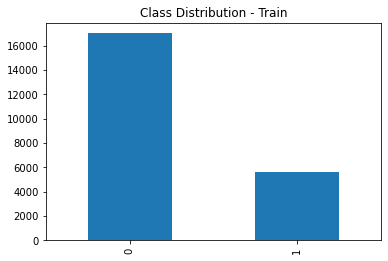

0    0.752156
1    0.247844
Name: class, dtype: float64


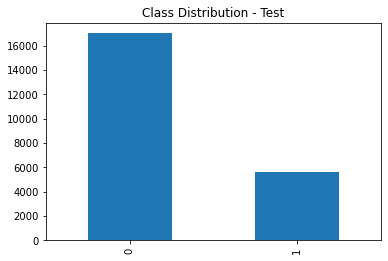

0    0.752156
1    0.247844
Name: class, dtype: float64


In [7]:
y_train['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution - Train')
plt.show()
print(y_train['class'].value_counts()/y_train.shape[0])

y_test['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution - Test')
plt.show()
print(y_test['class'].value_counts()/y_test.shape[0])

#### 3. Fit NB on Train

In [8]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB().fit(x_train, y_train.to_numpy().ravel()) # Default laplace smoothing

#### 4. Calculate Accuracy

In [9]:
pcc = 0.752**2 + 0.247**2
pcc*1.25

0.78314125

In [10]:
np.sum((y_test['class'].value_counts()/y_test.shape[0])**2)*1.25

0.7839566589795592

In [11]:
print('Train Acc =', model.score(x_train, y_train))
print(' Test Acc =', model.score(x_test, y_test))

Train Acc = 0.7889522798637831
 Test Acc = 0.788111980894255


### Exercise - Compare to Other Classifiers

Compare the performance of this model to the other classifiers you've learned in ML1.

Pay particular attention to both <u>*accuracy* and *training time*</u>!

In [16]:
# Your code here

def train_logistic(X, y, mode, plot=True):
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LogisticRegression
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.5,
                                                                  random_state=1,
                                                                 stratify=y)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
        
    
    C_list = np.logspace(-3,3,10)
    
    if mode == 'l1':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'solver': ['liblinear']}
    if mode == 'l2':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'dual': [False]}

    
    GS = GridSearchCV(
        LogisticRegression(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_c_idx = GS.cv_results_['mean_test_score'].argmax()
    best_c = GS.best_params_['C']
    best_val_acc = GS.cv_results_['mean_test_score'][best_c_idx]
    best_train_acc = GS.cv_results_['mean_train_score'][best_c_idx]

    # plotting error bars
    if plot:
        plt.errorbar(C_list, GS.cv_results_['mean_train_score'],
                 yerr=GS.cv_results_['std_train_score'], label="training accuracy",
                     color='#004369')
        plt.errorbar(C_list,  GS.cv_results_['mean_test_score'],
                     yerr=GS.cv_results_['std_test_score']/6, label="test accuracy",
                     color='#FFA500')
        #     plt.text((best_k+1/max_k+1), 0.5, f'n_neighbor = {best_k+1}', size=28)
        plt.ylabel("Accuracy")
        plt.xscale('log')
        plt.xlabel("C")
        plt.axvline(C_list[best_c_idx], color='#DB1F48', ls='--', lw=0.6)
        plt.legend()
        plt.show()
        
        

    # testing test set using optimal model
    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.coef_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)[0]
    coefs_mean

    # plotting top predictors
    # len(coefs_mean)
#     display(X.columns)
    if plot:
        fig, ax = plt.subplots(figsize=(10,7))
        ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

        ax.set_yticks(np.arange(len(coefs_mean)))
        ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
        plt.show()

    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return [f'Logistic Regression ({mode})', 'C', best_c, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

In [17]:
n_trials = 50
train_logistic(x,y.to_numpy().ravel(), 'l1', False)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')


['Logistic Regression (l1)',
 'C',
 0.001,
 0.7521560305813781,
 0.7521560464492756,
 0.7523670536207852,
 'relationship',
 16.368222951889038]

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1', C=0.001, solver='liblinear').fit(x_train, y_train)
LR.score(x_train, y_train)

C:\Users\JG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7521560302507629

In [24]:
LR.score(x_test, y_test)

0.7521560302507629

### Exercise - Classification with Mixed Data Types

Extend the pipeline above by using both numerical and categorical data types. Combine the `GaussianNB` and `CategoricalNB` models.

In [ ]:
# Your code here